In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
STdf = pd.read_csv('../data/Preseason/Aggregate/Summaries/2025mean-player-batting-order.csv')
Pdf = pd.read_csv('../../mlb-player-predictions/predictions/2025/batter_predictions_2025_022325.csv') # this repository is private right now, but we'll change that soon!
Pdf['player'] = Pdf['Name'].apply(lambda x: x.strip())
df = pd.merge(STdf,Pdf,left_on='player',right_on='player',how='inner')

In [4]:
df['PA_forecast'] = np.round(2*(-9*df['avg']+380),0) # using an empirically derived formula to estimate PA
df['PAdiff'] = df['PA_forecast']-df['PA']


In [14]:
df = df.sort_values(by='avg',ascending=True)
df.loc[(df['avg']<1.2) & (df['ngames']>6)]

,player,avg,ngames,teamgames,team,Name,PA,AVG,eAVG,HR,eHR,R,eR,RBI,eRBI,SB,eSB,Rank,Unnamed: 13
343,Matt Wallner,1.00,7,14,MIN,Matt Wallner,486,0.250,0.041,19,9,48,15,57,16,3,4,136,NaN
316,Jonathan India,1.00,7,16,KC,Jonathan India,569,0.250,0.035,15,9,76,20,58,18,10,7,80,NaN
302,Brenton Doyle,1.00,8,15,COL,Brenton Doyle,614,0.239,0.037,15,9,62,19,55,18,24,12,90,NaN
284,TJ Friedl,1.00,8,14,CIN,TJ Friedl,514,0.246,0.036,17,9,56,17,65,18,14,8,87,NaN
280,Jarren Duran,1.00,7,14,BOS,Jarren Duran,647,0.273,0.037,14,9,86,23,64,20,27,15,41,NaN
78,Masyn Winn,1.00,7,15,STL,Masyn Winn,628,0.233,0.036,10,7,53,18,44,16,8,7,154,NaN
86,Ian Happ,1.00,9,16,CHC,Ian Happ,644,0.249,0.035,21,11,83,23,79,22,11,8,28,NaN
98,Ketel Marte,1.00,9,16,AZ,Ketel Marte,620,0.278,0.039,29,13,91,23,87,23,7,6,16,NaN
132,LaMonte Wade Jr.,1.00,7,14,SF,LaMonte Wade Jr.,441,0.243,0.035,11,7,50,14,40,13,3,4,181,NaN
138,Steven Kwan,1.00,7,14,CLE,Steven Kwan,642,0.283,0.040,10,8,83,23,49,17,14,9,81,NaN


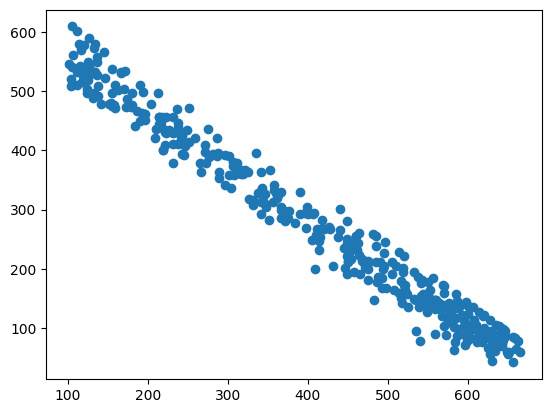

In [9]:
df = df.sort_values(by='PAdiff',ascending=False)
plt.plot(df['PA'],df['PAdiff'],'o')
plt.xlabel('Forecast PA')
plt.ylabel('difference in predicted PA')